In [2]:
import torch
print(torch.__version__)

2.3.1


我们先讨论使用y=wx这个简单的线性模型。使用穷举法，求出Cost Function关于权重w的关系和图像。

w= 0.0
	 1.0 2.0 0.0 4.0
	 2.0 4.0 0.0 16.0
	 3.0 6.0 0.0 36.0
MSE= 18.666666666666668
w= 0.1
	 1.0 2.0 0.1 3.61
	 2.0 4.0 0.2 14.44
	 3.0 6.0 0.30000000000000004 32.49
MSE= 16.846666666666668
w= 0.2
	 1.0 2.0 0.2 3.24
	 2.0 4.0 0.4 12.96
	 3.0 6.0 0.6000000000000001 29.160000000000004
MSE= 15.120000000000003
w= 0.30000000000000004
	 1.0 2.0 0.30000000000000004 2.8899999999999997
	 2.0 4.0 0.6000000000000001 11.559999999999999
	 3.0 6.0 0.9000000000000001 26.009999999999998
MSE= 13.486666666666665
w= 0.4
	 1.0 2.0 0.4 2.5600000000000005
	 2.0 4.0 0.8 10.240000000000002
	 3.0 6.0 1.2000000000000002 23.04
MSE= 11.946666666666667
w= 0.5
	 1.0 2.0 0.5 2.25
	 2.0 4.0 1.0 9.0
	 3.0 6.0 1.5 20.25
MSE= 10.5
w= 0.6000000000000001
	 1.0 2.0 0.6000000000000001 1.9599999999999997
	 2.0 4.0 1.2000000000000002 7.839999999999999
	 3.0 6.0 1.8000000000000003 17.639999999999993
MSE= 9.146666666666663
w= 0.7000000000000001
	 1.0 2.0 0.7000000000000001 1.6899999999999995
	 2.0 4.0 1.4000000000000001 6.75

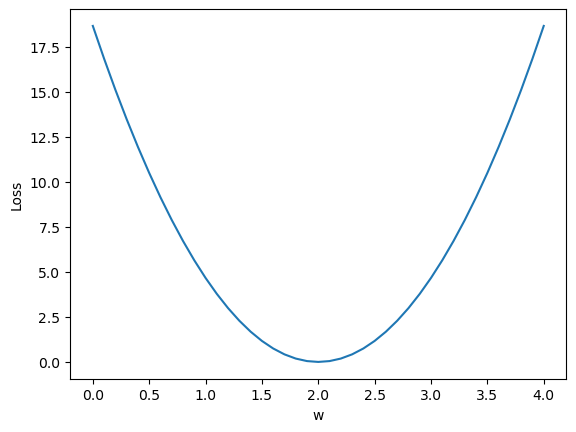

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

def forward(x):
    return x*w

def loss(x,y):
    y_pred = forward(x)
    return (y_pred-y)**2

w_list = []
mse_list = []

for w in np.arange(0.0, 4.1, 0.1):
    print('w=',w)
    l_sum = 0
    for x_val, y_val in zip(x_data, y_data):
        y_pred_val = forward(x_val)
        loss_val = loss(x_val,y_val)
        l_sum +=loss_val
        print('\t',x_val,y_val, y_pred_val,loss_val)
    print('MSE=', l_sum/3)
    w_list.append(w)
    mse_list.append(l_sum/3)

plt.plot(w_list,mse_list)
plt.ylabel('Loss')
plt.xlabel('w')
plt.show()

有了上面的基础，现在讨论一下model: y = wx+b ，这时，除了有权重w，还有一个bias b，所以Cost function的图像应该是一个三维的，w，b为自变量的曲面。

w= 0.0
b= -4.0
	 1.0 2.0 -4.0 36.0
	 2.0 4.0 -4.0 64.0
	 3.0 6.0 -4.0 100.0
MSE= 66.66666666666667
w= 0.0
b= -3.9
	 1.0 2.0 -3.9 34.81
	 2.0 4.0 -3.9 62.410000000000004
	 3.0 6.0 -3.9 98.01
MSE= 65.07666666666667
w= 0.0
b= -3.8
	 1.0 2.0 -3.8 33.64
	 2.0 4.0 -3.8 60.839999999999996
	 3.0 6.0 -3.8 96.04000000000002
MSE= 63.50666666666667
w= 0.0
b= -3.6999999999999997
	 1.0 2.0 -3.6999999999999997 32.489999999999995
	 2.0 4.0 -3.6999999999999997 59.28999999999999
	 3.0 6.0 -3.6999999999999997 94.08999999999999
MSE= 61.956666666666656
w= 0.0
b= -3.5999999999999996
	 1.0 2.0 -3.5999999999999996 31.359999999999996
	 2.0 4.0 -3.5999999999999996 57.76
	 3.0 6.0 -3.5999999999999996 92.16
MSE= 60.426666666666655
w= 0.0
b= -3.4999999999999996
	 1.0 2.0 -3.4999999999999996 30.25
	 2.0 4.0 -3.4999999999999996 56.25
	 3.0 6.0 -3.4999999999999996 90.25
MSE= 58.916666666666664
w= 0.0
b= -3.3999999999999995
	 1.0 2.0 -3.3999999999999995 29.159999999999993
	 2.0 4.0 -3.3999999999999995 54.7599999999999

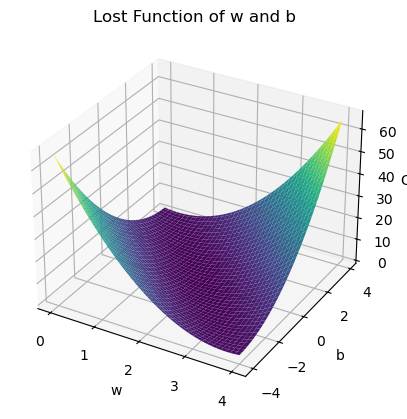

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#data set
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

#define a model
def forward(x):
    return x*w+b

#define a loss function
def loss(x,y):
    y_pred = forward(x)
    return (y_pred-y)*(y_pred-y)

# range and step of w and b

w_range = np.arange(0.0, 4.1, 0.1)
b_range = np.arange(-4.0,4.0, 0.1)

#initialation value
#将w，b网格化
W,B = np.meshgrid(w_range,b_range)
#创建一个和W相同的全0数组
MSE = np.zeros_like(W)

#build the cost function
for i,w in enumerate(w_range):
    for j,b in enumerate(b_range):
        print('w=',w)
        print('b=',b)
        l_sum = 0
        for x_val, y_val in zip(x_data, y_data):
            y_pred_val = forward(x_val)
            loss_val = loss(x_val,y_val)
            l_sum +=loss_val
            MSE[j,i] = l_sum / len(x_data)
            print('\t',x_val,y_val, y_pred_val,loss_val)
        print('MSE=', l_sum/3)

#Creating a 3D graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#drawing 3D graphics
ax.plot_surface(W, B, MSE, cmap='viridis')

ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Cost')
ax.set_title('Lost Function of w and b')

plt.show()

然而在实际的应用中，采用穷举法并不能解决问题，一方面是无法找到Cost Function的globa minimum，而且随着权重的变多，形成的cost图像也不只是一个凸函数，给最小值的寻找带来了很多问题。
这时我们就引入了Gradient Descent梯度下降法来求得Cost Function的最小值。在深度学习默认的梯度下降法，我们都采用的是mini-batch的算法进行随机梯度下降。用这样的方法克服鞍点所带来的问题。

这里先以y=wx为例，引入梯度下降法 $ \omega = \omega - \alpha\frac{\partial cost}{\partial \omega} $ 得出

$$
\omega = \omega - \alpha \frac{1}{N}\sum_{n=1}^N 2\cdot x_n \cdot (x_n \cdot \omega - y_n)
$$

Predict (before traning) 4 4.0
Epoch 0 w= 1.0933333333333333 4.666666666666667
Epoch 1 w= 1.1779555555555554 3.8362074074074086
Epoch 2 w= 1.2546797037037036 3.1535329869958857
Epoch 3 w= 1.3242429313580246 2.592344272332262
Epoch 4 w= 1.3873135910979424 2.1310222071581117
Epoch 5 w= 1.4444976559288012 1.7517949663820642
Epoch 6 w= 1.4963445413754464 1.440053319920117
Epoch 7 w= 1.5433523841804047 1.1837878313441108
Epoch 8 w= 1.5859728283235668 0.9731262101573632
Epoch 9 w= 1.6246153643467005 0.7999529948031382
Epoch 10 w= 1.659651263674342 0.6575969151946154
Epoch 11 w= 1.6914171457314033 0.5405738908195378
Epoch 12 w= 1.7202182121298057 0.44437576375991855
Epoch 13 w= 1.7463311789976905 0.365296627844598
Epoch 14 w= 1.7700069356245727 0.3002900634939416
Epoch 15 w= 1.7914729549662791 0.2468517784170642
Epoch 16 w= 1.8109354791694263 0.2029231330489788
Epoch 17 w= 1.8285815011136133 0.16681183417217407
Epoch 18 w= 1.8445805610096762 0.1371267415488235
Epoch 19 w= 1.8590863753154396 0

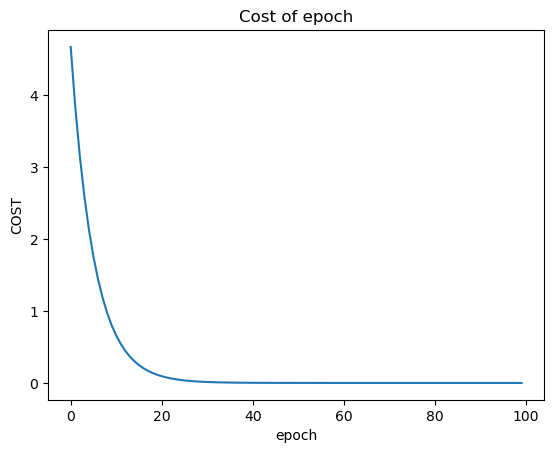

In [25]:
import matplotlib.pyplot as plt

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

w=1.0

# model defination
def forward(x):
    return x*w

def cost(xs,ys):
    cost = 0
    for x,y in zip(xs,ys):
        y_pred = forward(x)
        cost += (y_pred - y)**2
    return cost / len(xs)
    
def gradient(xs,ys):
    grad = 0
    for x,y in zip(xs,ys):
        grad += 2*x*(x*w - y)
    return grad/len(xs)

cost_value = []

print('Predict (before traning)',4,forward(4))
for epoch in range(100):
    cost_val = cost(x_data,y_data)
    grad_val = gradient(x_data,y_data)
    w -=0.01*grad_val
    cost_value.append(cost_val)
    print('Epoch',epoch, 'w=',w, cost_val)
print('Predict(after training)',4,forward(4))

plt.plot(range(100),cost_value)
plt.xlabel('epoch')
plt.ylabel('COST')
plt.title('Cost of epoch')
plt.show()



    

从上面的例子可以看出，引入梯度下降法后，我们就可以通过代码实现Cost Function最小值的自动寻找。

这种方法适用于凸函数，并且没有鞍点的模型。一旦函数处于鞍点，也就是处于梯度为0的点，会导致梯度下降算法无法继续。为了克服这一问题，人们引入随机梯度下降算法。

梯度下降算法是将所有Loss的和加起来再平均的结果进行梯度计算。 在随机梯度下降中，我们只随机的挑选一个Loss进行梯度计算。

如下所示,从 $ \omega = \omega - \alpha\frac{\partial cost}{\partial \omega} $ 到 $ \omega = \omega - \alpha\frac{\partial loss}{\partial \omega} $ 

其中：
$ \frac{\partial cost}{\partial \omega} = \frac{1}{N}\sum_{n=1}^N 2\cdot x_n \cdot (x_n \cdot \omega - y_n)$ 

$ \frac{\partial loss_n}{\partial \omega} = 2\cdot x_n \cdot (x_n \cdot \omega - y_n)$ 


而原先的梯度下降计算公式：
$$
\omega = \omega - \alpha \frac{1}{N}\sum_{n=1}^N 2\cdot x_n \cdot (x_n \cdot \omega - y_n)
$$
也变成了：
$$
\omega = \omega - \alpha \cdot 2\cdot x_n \cdot (x_n \cdot \omega - y_n)
$$


Predict before training 4 4.0
	 grad 1.0 2.0 -2.0
	 grad 2.0 4.0 -7.84
	 grad 3.0 6.0 -16.2288
Progress 0 w= 1.260688 loss= 7.315943039999998
	 grad 1.0 2.0 -1.478624
	 grad 2.0 4.0 -5.796206079999999
	 grad 3.0 6.0 -11.998146585599997
Progress 1 w= 1.453417766656 loss= 3.9987644858206908
	 grad 1.0 2.0 -1.093164466688
	 grad 2.0 4.0 -4.285204709416961
	 grad 3.0 6.0 -8.87037374849311
Progress 2 w= 1.5959051959019805 loss= 2.1856536232765476
	 grad 1.0 2.0 -0.8081896081960389
	 grad 2.0 4.0 -3.1681032641284723
	 grad 3.0 6.0 -6.557973756745939
Progress 3 w= 1.701247862192685 loss= 1.1946394387269013
	 grad 1.0 2.0 -0.59750427561463
	 grad 2.0 4.0 -2.3422167604093502
	 grad 3.0 6.0 -4.848388694047353
Progress 4 w= 1.7791289594933983 loss= 0.6529686924601721
	 grad 1.0 2.0 -0.44174208101320334
	 grad 2.0 4.0 -1.7316289575717576
	 grad 3.0 6.0 -3.584471942173538
Progress 5 w= 1.836707389300983 loss= 0.3569010862285927
	 grad 1.0 2.0 -0.3265852213980338
	 grad 2.0 4.0 -1.2802140678802925
	

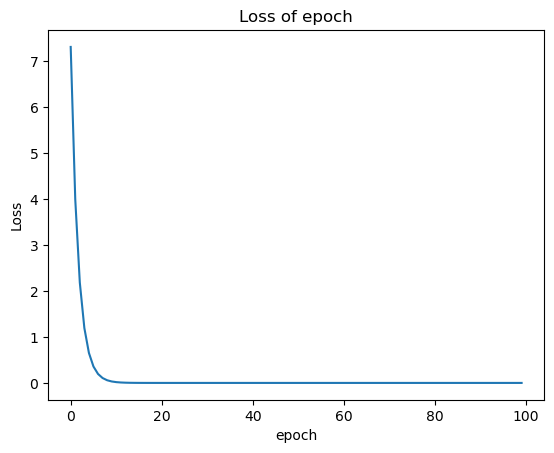

In [30]:
import matplotlib.pyplot as plt

x_data = [1.0,2.0,3.0]
y_data = [2.0,4.0,6.0]

w=1.0

def forward(x):
    return x*w 

def loss(x,y):
    y_pred = forward(x)
    return (y_pred - y)**2

def gradient(x,y):
    return 2*x*(x*w-y)

loss_value = []

print('Predict before training' ,4 , forward(4))

for epoch in range(100):
    for x,y in zip (x_data,y_data):
        grad = gradient(x,y)
        l = loss(x,y)
        w -= 0.01*grad
        print("\t grad",x,y,grad)
    loss_value.append(l)
    
    print("Progress",epoch,'w=',w,"loss=",l)

print('Predict (after Training)', 4, forward(4))

plt.plot(range(100),loss_value)
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Loss of epoch')
plt.show()



    

如上所示，采用了随机梯度下降后，我们也得到了一个更成功的预测（相比梯度下降算法），但是这种计算过程是串行计算的（梯度下降是并行），需要计算每个点的gradient，然后再更新w的值以此类推，通常情况下会消耗更久的时间。为了折中两种方法，采用批量梯度计算（BGD，Batch Gradient Descent），而不是每个数据，称为。如今默认采用的随机梯度下降SGD算法就是用的Batch，然而Batch指的是整个data set，而我们这里只是一个小的dataset，也称为mini-Batch。
mini-batch 计算效率更高，收敛速度更快，适用于大数据集，而且引入了噪声，帮助跳出局部最优解，向全局最优解收敛。

<font size ="3">**随着模型复杂度的提高以及对效率的高要求，人们引入方向传播来计算梯度，通过链式法则，避免了重复计算，一次前向传播和一次反向传播即可计算出所有参数的梯度。**

<p>&nbsp;&nbsp;&nbsp;&nbsp;梯度下降：是一种优化算法，目的是通过迭代更新参数来最小化损失函数。<p>

<p>&nbsp;&nbsp;&nbsp;&nbsp;反向传播：是一种计算梯度的方法，目的是有效地计算神经网络中每个参数的梯度。<p>

反向传播（Backpropagation）是一种用于训练神经网络的算法。它是通过计算损失函数的梯度并将其传播回去，以更新神经网络中的权重和偏置，从而最小化损失函数。反向传播是梯度下降的一种具体实现，它在神经网络的训练过程中发挥了重要作用。

*反向传播的优点

<p> &nbsp;&nbsp;&nbsp;&nbsp;高效：通过链式法则，反向传播可以有效地计算每个参数的梯度。<p>

<p> &nbsp;&nbsp;&nbsp;&nbsp;通用：适用于各种类型的神经网络结构。 <p>

<p> &nbsp;&nbsp;&nbsp;&nbsp;自动化：大多数深度学习框架（如 TensorFlow、PyTorch 等）都提供了自动求导和反向传播功能，使得实现复杂神经网络变得更加容易。 <p>

*反向传播的局限性

<p>&nbsp;&nbsp;&nbsp;&nbsp;    局部最优：在非凸损失函数上，可能会陷入局部最优解。<p>

<p>&nbsp;&nbsp;&nbsp;&nbsp;    梯度消失：在深层网络中，梯度可能会在反向传播过程中逐渐消失，导致训练效率低下。<p>
    

    

Predict (befor training) 4 4.0
	grad: 1.0 2.0 -2.0
	grad: 2.0 4.0 -7.840000152587891
	grad: 3.0 6.0 -16.228801727294922
Progress: 0 7.315943717956543
	grad: 1.0 2.0 -1.478623867034912
	grad: 2.0 4.0 -5.796205520629883
	grad: 3.0 6.0 -11.998146057128906
Progress: 1 3.9987640380859375
	grad: 1.0 2.0 -1.0931644439697266
	grad: 2.0 4.0 -4.285204887390137
	grad: 3.0 6.0 -8.870372772216797
Progress: 2 2.1856532096862793
	grad: 1.0 2.0 -0.8081896305084229
	grad: 2.0 4.0 -3.1681032180786133
	grad: 3.0 6.0 -6.557973861694336
Progress: 3 1.1946394443511963
	grad: 1.0 2.0 -0.5975041389465332
	grad: 2.0 4.0 -2.3422164916992188
	grad: 3.0 6.0 -4.848389625549316
Progress: 4 0.6529689431190491
	grad: 1.0 2.0 -0.4417421817779541
	grad: 2.0 4.0 -1.7316293716430664
	grad: 3.0 6.0 -3.58447265625
Progress: 5 0.35690122842788696
	grad: 1.0 2.0 -0.3265852928161621
	grad: 2.0 4.0 -1.2802143096923828
	grad: 3.0 6.0 -2.650045394897461
Progress: 6 0.195076122879982
	grad: 1.0 2.0 -0.24144840240478516
	grad: 2.0

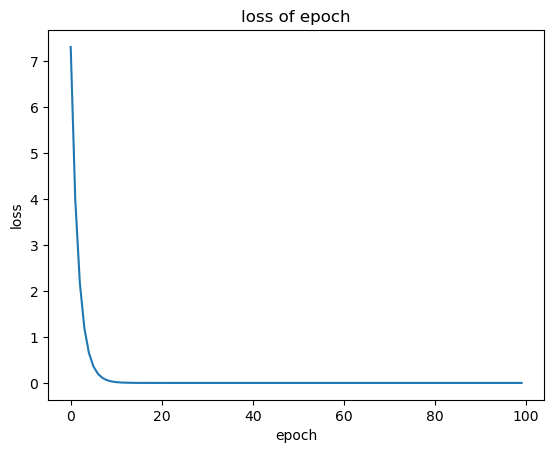

In [36]:
import torch
import matplotlib.pyplot as plt

x_data = [1.0,2.0,3.0]
y_data = [2.0,4.0,6.0]

w = torch.tensor([1.0])
w.requires_grad = True

#w is tensor， when x times w, x will be automatically converted to tensor
def forward(x):
    return w*x 

def loss(x,y):
    y_pred = forward(x)
    return (y_pred - y)**2

loss_value = []

#x is tensor, we need use item() to take the scaler.
print('Predict (befor training)', 4, forward(4).item())

for epoch in range(100):
    for x,y in zip(x_data,y_data):
        l = loss(x,y)
        #   Calculate in order to get the gradients of all parameters (here only w) on the computational path of 
        #   l and store them in the corresponding tensor, e.g., the gradient of w is represented as w.grad
        l.backward()
        print('\tgrad:',x,y,w.grad.item())
        w.data = w.data - 0.01*w.grad.data

        #clear the gradient value
        w.grad.data.zero_()
    loss_value.append(l.item())
    print('Progress:',epoch, l.item())
print("Predict (after training)",4,forward(4).item())

plt.plot(range(100),loss_value)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss of epoch')
plt.show()



    